# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [1]:
import requests, re # re is a module for regular expressions: to detect various combinations of characters
import operator

##These functions will be used for all texts we examine

#Remove html markup using bs4 from BeautifulSoup
def cleanHtml(html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

#We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[_,"“”!\.\'&\|:@>?*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

## Part 1:  Compare word frequencies between two works of a single author.

We present a comparison on Edgar Allan Poe's short story "The Cask of Amontillado" with his narrative poem "The Raven."

In [2]:
# Import The Cask of Amontillado, by Edgar Allan Poe from a txt document online
r = requests.get('https://www.gutenberg.org/cache/epub/1063/pg1063.txt')
t = cleanHtml(r.text).lower()

# split string into an array of words using any sequence of spaces "\s+" 
wds = re.split('\s+',t)

#Clean by removing [,"\.\'&\|:@>*;/=] and ^[0-9\.]*$
for i in range(len(wds)):
    wds[i] = cleanWord(wds[i])
    
#Since the first sentence begins with "The thousand injuries of Fortunato I had borne..."
#We want to remove all that comes prior to "The", "thousand":
for i in range(len(wds)):
    if wds[i] == "the":
        if wds[i+1] == "thousand":
            for j in range(0,i):
                wds.pop(0)
            break

#Since the last word is requiescat, which appears only once, we remove all that comes after it.
for i in range(len(wds)):
    if wds[i] == "requiescat":
        for j in range(i+1, len(wds)):
            wds.pop(len(wds)-1)
        break

#Remove '--' from words. 
#If at the end of the word, drop the '--'
#If in the middle of the word, then '--' separates two words. 
    #Replace with the first word, append the second word to the end of wds.
for i in range(len(wds)):
    word = wds[i]
    if "--" in word:
        if word[-2]+word[-1] == '--': #If -- is at the end of the word
            wds[i] = word.replace("--","")    

        else: #if -- is in the middle of the word:
            for j in range(len(word)-1):
                if word[j]+word[j+1] == '--':
                    string1 = word[:j]; string2 = word[j+2:]
            wds[i] = string1; wds.append(string2)
            
#save The Cask of Amontillado, by Edgar Allan Poe
eap1 = wds

In [3]:
# Import The Raven, by Edgar Allan Poe from a txt document online
r = requests.get('https://www.gutenberg.org/cache/epub/1065/pg1065.txt')
t = cleanHtml(r.text).lower()

# split string into an array of words using any sequence of spaces "\s+" 
wds = re.split('\s+',t)

#Clean by removing [,"\.\'&\|:@>*;/=] and ^[0-9\.]*$
for i in range(len(wds)):
    wds[i] = cleanWord(wds[i])
    
#Since the first sentence begins with "Once upon a midnight dreary, while I pondered, weak and weary..."
#We want to remove all that comes prior to "Once", "upon":
for i in range(len(wds)):
    if wds[i] == "once":
        if wds[i+1] == "upon":
            for j in range(0,i):
                wds.pop(0)
            break
            
#Since the last word is "lifted—nevermore," which appears only once, we remove all that comes after it.
for i in range(len(wds)):
    if wds[i] == "lifted—nevermore":
        for j in range(i+1, len(wds)):
            wds.pop(len(wds)-1)
        break
        
#Remove '—' from words. ('—' must be copied and pasted from txt, the typed '-' doesn't work...)
#If at the end of the word, drop the '—'
#If in the middle of the word, then '—' separates two words. 
    #Replace with the first word, append the second word to the end of wds.
for i in range(len(wds)):
    word = wds[i]
    if "—" in word:
        if word[-1] == '—': #If - is at the end of the word
            wds[i] = word.replace("—","")    

        else: #if - is in the middle of the word:
            for j in range(len(word)-1):
                if word[j] == '—':
                    string1 = word[:j]; string2 = word[j+1:]
            wds[i] = string1; wds.append(string2)
            
#save The Raven, by Edgar Allan Poe
eap2 = wds

Text(0.5, 0, 'The Raven')

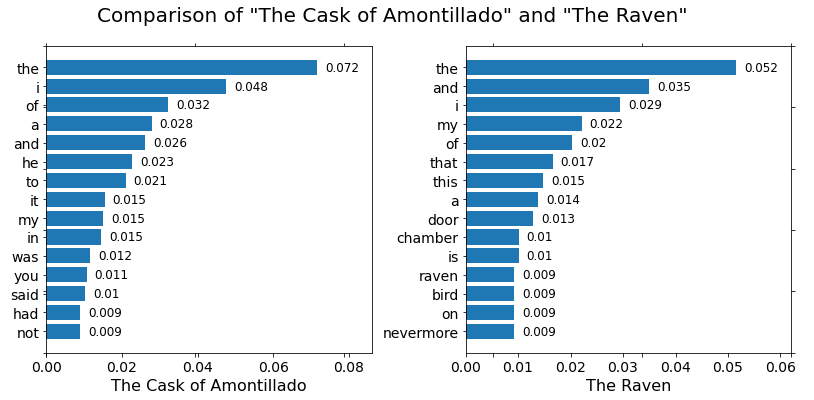

In [4]:
#Calculate word frequency for The Cask of Amontillado, The Raven

from collections import Counter
wf_eap1 = Counter(eap1)
wf_eap2 = Counter(eap2)
    
#how many total words in the document?
total_wds_eap1 = 0
total_wds_eap2 = 0
for w in wf_eap1:
    total_wds_eap1 += wf_eap1[w] 
for w in wf_eap2:
    total_wds_eap2 += wf_eap2[w] 

# Get ordered list
wf_eap1_sorted = sorted(wf_eap1.items(), key = operator.itemgetter(1), reverse=True); wf_eap1 = wf_eap1_sorted[0:min(len(wf_eap1_sorted),15)][::-1]
wf_eap2_sorted = sorted(wf_eap2.items(), key = operator.itemgetter(1), reverse=True); wf_eap2 = wf_eap2_sorted[0:min(len(wf_eap2_sorted),15)][::-1]

#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
f = plt.figure (figsize=(12, 6), tight_layout = True)
# this is painfully tedious....
f.suptitle ("Comparison of \"The Cask of Amontillado\" and \"The Raven\"", fontsize=20)
ax = f.add_subplot(111)
ax.spines['top'].set_color('none'); ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none'); ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

# Create two subplots, this is the first one
ax1 = f.add_subplot(121); plt.subplots_adjust(wspace=.2)
pos = np.arange(len(wf_eap1)) 
ax1.tick_params(axis='both', which='major', labelsize=14)
pylab.yticks(pos, [x[0] for x in wf_eap1])
hbars = ax1.barh(range(len(wf_eap1)), [x[1]/total_wds_eap1 for x in wf_eap1], align='center')
ax1.bar_label(hbars, labels=[ np.round(val[1]/ total_wds_eap1, 3) for val in wf_eap1], padding=8, color='k', fontsize=12)
ax1.set_xlim(right=0.086)
ax1.set_xlabel("The Cask of Amontillado", fontsize = 16)

ax2 = f.add_subplot(122); plt.subplots_adjust(wspace=.5)
pos = np.arange(len(wf_eap1)) 
ax2.tick_params(axis='both', which='major', labelsize=14)
pylab.yticks(pos, [x[0] for x in wf_eap2])
hbars = ax2.barh(range(len(wf_eap2)), [x[1]/ total_wds_eap2 for x in wf_eap2], align='center')
ax2.bar_label(hbars, labels=[ np.round(val[1]/ total_wds_eap2, 3) for val in wf_eap2], padding=8, color='k', fontsize=12)
ax2.set_xlim(right=0.062)
ax2.set_xlabel("The Raven", fontsize = 16)

## Part 2: Compare word frequencies between works of two authors.

We compare the word frequencies of Edgar Allan Poe's "The Raven" with W.W. Jacob's "The Monkey's Paw."

In [5]:
# Import The Monkey's Paw, by W.W. Jacobs from a txt document online
r = requests.get('https://www.gutenberg.org/cache/epub/12122/pg12122.txt')
t = cleanHtml(r.text).lower()

# split string into an array of words using any sequence of spaces "\s+" 
wds = re.split('\s+',t)

#Clean by removing [,"\.\'&\|:@>*;/=] and ^[0-9\.]*$
for i in range(len(wds)):
    wds[i] = cleanWord(wds[i])   
    
#Since the first sentence begins with "Without, the night was cold and wet..."
#We want to remove all that comes prior to "Without", "the":
for i in range(len(wds)):
    if wds[i] == "without":
        if wds[i+1] == "the":
            for j in range(0,i):
                wds.pop(0)
            break
            
# #Since the two words are "deserted road," which appears only once in combo, we remove all that comes after it.
for i in range(len(wds)):
    if wds[i] == "deserted":
        if wds[i+1] == "road":
            for j in range(i+2, len(wds)):
                wds.pop(len(wds)-1)
            break

#Remove II. III. section titles (already removed I. by dropping all that came before "without the") 
for i in range(len(wds)):
    word = wds[i]
    if (word == "ii"):
        wds.pop(i)
    elif (word == "iii"):
        wds.pop(i)
        break
            
#save The Monkey's Paw, by W.W. Jacobs
wwj = wds

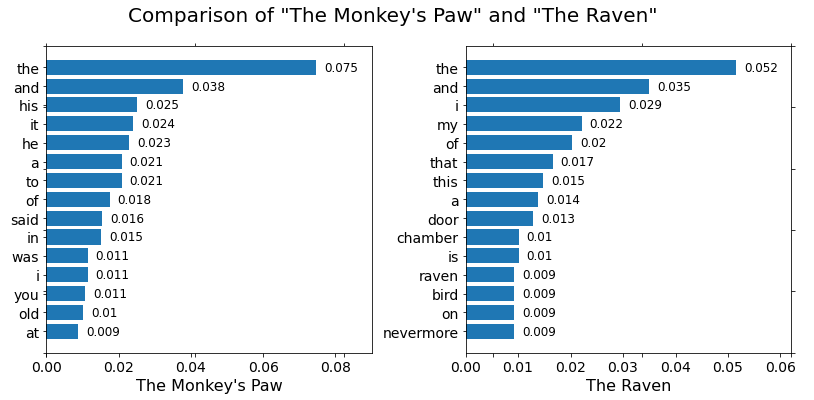

In [6]:
#Calculate word frequency for The Monkey's Paw
wf_wwj = Counter(wwj)

#how many total words in the document?
total_wds_wwj = 0
for w in wf_wwj:
    total_wds_wwj += wf_wwj[w] 

# Get ordered list
wf_wwj_sorted = sorted(wf_wwj.items(), key = operator.itemgetter(1), reverse=True); wf_wwj = wf_wwj_sorted[0:min(len(wf_wwj_sorted),15)][::-1]

#Plot the results: are there striking differences in language?

%matplotlib inline
f = plt.figure (figsize=(12, 6), tight_layout = True)
# this is painfully tedious....
f.suptitle ("Comparison of \"The Monkey's Paw\" and \"The Raven\"", fontsize=20)
ax = f.add_subplot(111)
ax.spines['top'].set_color('none'); ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none'); ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

# Create two subplots, this is the first one
ax1 = f.add_subplot(121); plt.subplots_adjust(wspace=.5)
pos = np.arange(len(wf_wwj)) 
ax1.tick_params(axis='both', which='major', labelsize=14)
pylab.yticks(pos, [x[0] for x in wf_wwj])
hbars = ax1.barh(range(len(wf_wwj)), [x[1]/ total_wds_wwj for x in wf_wwj], align='center')
ax1.bar_label(hbars, labels=[ np.round(val[1]/ total_wds_wwj, 3) for val in wf_wwj], padding=8, color='k', fontsize=12)
ax1.set_xlim(right=0.09)
ax1.set_xlabel("The Monkey's Paw", fontsize = 16)

ax2 = f.add_subplot(122); plt.subplots_adjust(wspace=.5)
pos = np.arange(len(wf_eap1)) 
ax2.tick_params(axis='both', which='major', labelsize=14)
pylab.yticks(pos, [x[0] for x in wf_eap2])
hbars = ax2.barh(range(len(wf_eap2)), [x[1]/ total_wds_eap2 for x in wf_eap2], align='center')
ax2.bar_label(hbars, labels=[ np.round(val[1]/ total_wds_eap2, 3) for val in wf_eap2], padding=8, color='k', fontsize=12)
ax2.set_xlim(right=0.062)
ax2.set_xlabel("The Raven", fontsize = 16)

plt.show()

## Part 3: Are there some words preferred by one author but used less frequently by another author?

Overall, the word frequency comparisons across different authors seems similar. We only used one work by W.W. Jacobs in our analysis, but when comparing his short story "The Monkey's Paw" with "The Raven" and "The Cask of Amontillado" by Edgar Allen Poe, we see that the word "the" is the most commonly used work in all three pieces. However, the word frequency shows that "I" was commonly used by Poe, suggesting a first-person narrator, while "he" and "his" was more commonly used than "I" by Jacobs. All three works use many of the same, short and common words, including "a," "of," "to," and "and." Specific to "The Raven" but not necessarily Poe at large are "bird," "chamber," "door," and "nevermore." There is no drastic difference in language, though, between the two authors.

## Extra Credit: 

The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

We examine the frequency of the word "said" in all three texts to see if the binomial distributions differ significantly.

In [29]:
said_eap1 = len([x for x in eap1 if x == "said"]); print(r"$\hat{p}_1 =$ ", said_eap1/len(eap1))
said_eap2 = len([x for x in eap2 if x == "said"]); print(r"$\hat{p}_2 =$ ", said_eap2/len(eap2))
said_wwj = len([x for x in wwj if x == "said"]); print(r"$\hat{p}_3 =$ ", said_wwj/len(wwj))

$\hat{p}_1 =$  0.010282776349614395
$\hat{p}_2 =$  0.006445672191528545
$\hat{p}_3 =$  0.015501905972045744


We construct a hypothesis test to see if the binomial distributions (characterized by $p$, where $p$ is the probability of a word being "said") differ significantly between works by Edgar Allan Poe. We use "The Cask of Amontillado" and "The Raven" in our comparison. That is, we define the following hypotheses:

$$
H_0: p_1 = p_2
$$
$$
H_1: p_1 \neq p_2
$$

To test whether or not the null hypthesis holds, we evaluate the test statistic, 
$$
z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}}
$$
where $\hat{p} = \frac{n_1\hat{p}_1 + n_2\hat{p}_2}{n_1+n_2}$

In [33]:
#Define sample probabilities of "said"
n1 = len(eap1); n2 = len(eap2); n3 = len(wwj)
p1_hat = said_eap1/n1; p2_hat = said_eap2/n2; p3_hat = said_wwj/n3

#Define test statistic
p_hat = (n1*p1_hat + n2*p2_hat)/(n1+n2)
z = (p1_hat - p2_hat)/(np.sqrt(p_hat*(1-p_hat)*(1/n1 + 1/n2))); print(z)

1.10221254179438


Using a significance level $\alpha = 0.05$ for a two-tailed t-test, we set the threshold $z_{\alpha /2} = 1.96$. Since $|z| \approx 1.10 < 1.96$, we fail to reject the null hypothesis. That is, it is reasonable to conclude that the occurance of the word "said" in these two works is statistically similar.

Now, we construct a hypothesis test to see if the binomial distributions differ significantly across different authors. We use "The Raven" by Edgar Allan Poe and "The Monkey's Paw" by W.W. Jacobs in our comparison. That is, we define the following hypotheses:
$$
H_0: p_3 = p_2
$$
$$
H_1: p_3 \neq p_2
$$

To test whether or not the null hypthesis holds, we evaluate the test statistic, 
$$
z = \frac{\hat{p}_3 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_3}+\frac{1}{n_2})}}
$$
where $\hat{p} = \frac{n_3\hat{p}_3 + n_2\hat{p}_2}{n_3+n_2}$

In [34]:
#Define test statistic
p_hat = (n3*p3_hat + n2*p2_hat)/(n3+n2)
z = (p3_hat - p2_hat)/(np.sqrt(p_hat*(1-p_hat)*(1/n3 + 1/n2))); print(z)

2.2858166737339176


Using a significance level $\alpha = 0.05$ for a two-tailed t-test, we set the threshold $z_{\alpha /2} = 1.96$. Since $|z| \approx 2.29 > 1.96$, we reject the null hypothesis. That is, it is reasonable to conclude that the occurance of the word "said" in these two works is not statistically similar.